   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


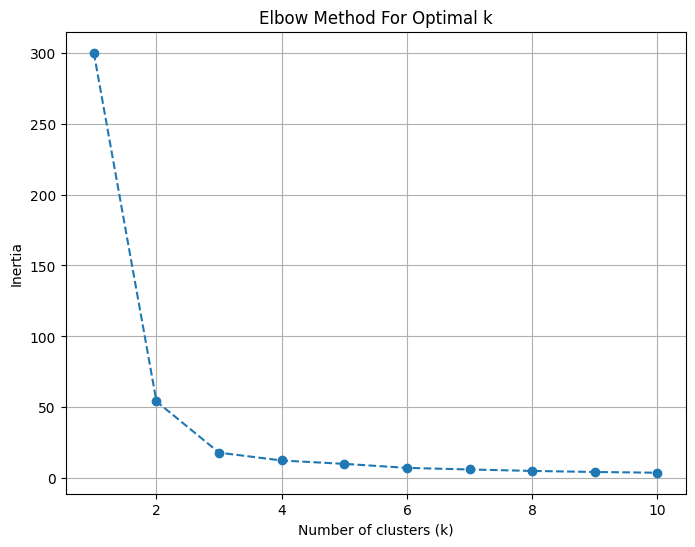

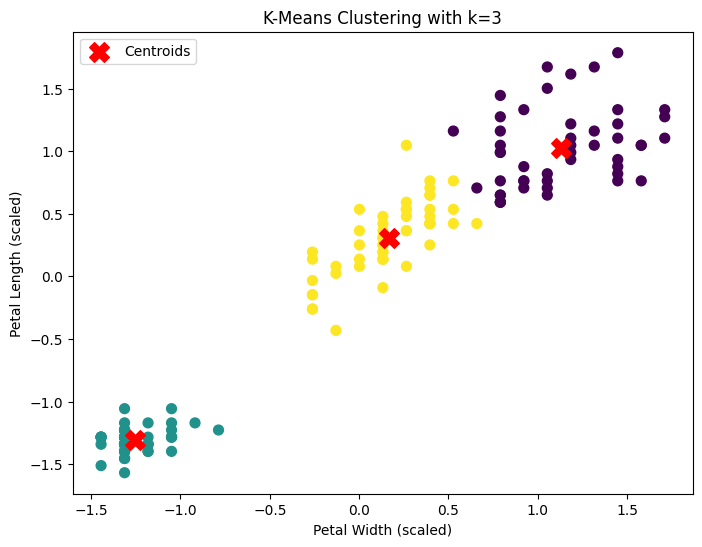

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the iris dataset
df = pd.read_csv('/content/iris (6).csv')

# Display the first few rows to understand its structure
print(df.head())

# Select only petal width and petal length features for clustering
X = df[['petal_width', 'petal_length']]

# Check if scaling helps with clustering (optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Use the elbow method to find the optimal value of k (number of clusters)
inertia = []

# Try different values of k from 1 to 10 and calculate the inertia (sum of squared distances)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Use scaled data for KMeans
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 2. Fit KMeans with the optimal number of clusters (k=3 for example, based on elbow plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.xlabel('Petal Width (scaled)')
plt.ylabel('Petal Length (scaled)')
plt.legend()
plt.show()
